In [1]:
# Import necessary libraries for data analysis and visualization
import pandas as pd  # Import pandas for data manipulation
import seaborn as sns  # Import seaborn for advanced data visualization
import numpy as np  # Import numpy for numerical operations
import matplotlib.pyplot as plt  # Import matplotlib for basic plotting
from bs4 import BeautifulSoup  # Import BeautifulSoup for web scraping
import requests  # Import requests for making HTTP requests

In [2]:
# Define the URL of the web page to scrape
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

# Making an HTTP request to retrieve the web page
page = requests.get(url)

# Creating a BeautifulSoup object to parse the HTML content of the page
soup = BeautifulSoup(page.text, 'html.parser')

In [3]:
# Finding the second table element on the web page (index 1)
table = soup.find_all('table')[1]

In [4]:
# Finding all the table header elements (th) within the 'table'
table_titles = table.find_all('th')

In [5]:
#Obtaining table column titles.
table_titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [6]:
#Collecting and printing all the stripped text from the table header elements.
all_table_titles = [title.text.strip() for title in table_titles]

print(all_table_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [7]:
#Creating a new DataFrame with columns matching the extracted table header titles.
new_table = pd.DataFrame(columns = all_table_titles)

new_table

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [8]:
# Collecting data from all the table rows (tr).
column_data = table.find_all('tr')

In [9]:
# Iterating through each row in the table data, starting from the second row (index 1)
for row in column_data[1:]:
    # Finding all table data elements (td) within the current row
    row_data = row.find_all('td')
    
    # Extracting and stripping the text from each table data element, creating a list of individual row data
    individual_row_data = [data.text.strip() for data in row_data]
    
    # Determining the current length of the new DataFrame and adding a new row with the individual row data
    length = len(new_table)
    new_table.loc[length] = individual_row_data

In [10]:
new_table

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


In [11]:
# Saving the DataFrame to a CSV file
new_table.to_csv('Largest US companies by revenue 2023.csv', index=False)

In [12]:
# Checking for missing data in the DataFrame
missing_data = new_table.isnull().sum()

# Displaying the count of missing values for each column
missing_data

Rank                      0
Name                      0
Industry                  0
Revenue (USD millions)    0
Revenue growth            0
Employees                 0
Headquarters              0
dtype: int64

In [13]:
# Generating a descriptive statistics for the DataFrame
new_table.describe()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
count,100,100,100,100,100,100,100
unique,100,100,38,99,92,97,76
top,1,Walmart,Financials,"47,194",9.4%,"50,000","New York City, New York"
freq,1,1,11,2,2,2,12


In [14]:
# Displaying information about the DataFrame
new_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    object
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: object(7)
memory usage: 6.2+ KB


In [15]:
# Removing commas from the nember values in 'Revenue (USD millions)' column for easy datatype conversion
new_table['Revenue (USD millions)'] = new_table['Revenue (USD millions)'].str.replace(',', '')

# Converting the column to integer data type
new_table['Revenue (USD millions)'] = new_table['Revenue (USD millions)'].astype(int)

In [16]:
# Removing '%' symbols from the 'Revenue growth' column and converting to float
# After stripping and conversion, datasets in the column are multiplied and then divided by 100 respectively to get in percentage
new_table['Revenue growth'] = new_table['Revenue growth'].str.rstrip('%').astype(float) * 100 / 100

In [17]:
# Removing commas from the 'Revenue (USD millions)' column
new_table['Employees'] = new_table['Employees'].str.replace(',', '')

# Converting the datatype in the column to integer
new_table['Employees'] = new_table['Employees'].astype(int)

In [18]:
# Convert the datatype in the 'Rank' column to integer
new_table['Rank'] = new_table['Rank'].astype(int)


In [19]:
# Displaying information about the DataFrame after data type conversion
new_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    100 non-null    int32  
 1   Name                    100 non-null    object 
 2   Industry                100 non-null    object 
 3   Revenue (USD millions)  100 non-null    int32  
 4   Revenue growth          100 non-null    float64
 5   Employees               100 non-null    int32  
 6   Headquarters            100 non-null    object 
dtypes: float64(1), int32(3), object(3)
memory usage: 5.1+ KB


In [20]:
# Displaying the first few rows of the DataFrame
new_table.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611289,6.7,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,513983,9.4,1540000,"Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,413680,44.8,62000,"Spring, Texas"
3,4,Apple,Electronics industry,394328,7.8,164000,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,"Minnetonka, Minnesota"


In [21]:
# Calculating basic statistics
mean_revenue = new_table['Revenue (USD millions)'].mean()
median_revenue = new_table['Revenue (USD millions)'].median()
std_dev_revenue = new_table['Revenue (USD millions)'].std()
min_revenue = new_table['Revenue (USD millions)'].min()
max_revenue = new_table['Revenue (USD millions)'].max()

In [22]:
mean_revenue

117566.46

In [23]:
median_revenue

80824.5

In [24]:
std_dev_revenue

100915.11216343164

In [25]:
min_revenue

44200

In [26]:
max_revenue

611289

In [27]:
# Calculating quartiles for the 'Revenue (USD millions)' column
quartiles = new_table['Revenue (USD millions)'].quantile([0.25, 0.5, 0.75])

# Displaying the quartile values
quartiles


0.25     57876.0
0.50     80824.5
0.75    138763.0
Name: Revenue (USD millions), dtype: float64

In [52]:
# Grouping by industry and calculating summary statistics
industry_summary = new_table.groupby('Industry')['Revenue (USD millions)'].describe()

industry_summary

,count,mean,std,min,25%,50%,75%,max
Industry,,,,,,,,
Aerospace and Defense,1.0,65984.000000,NaN,65984.0,65984.00,65984.0,65984.00,65984.0
Aerospace and defense,1.0,66608.000000,NaN,66608.0,66608.00,66608.0,66608.00,66608.0
Agriculture cooperative,1.0,47194.000000,NaN,47194.0,47194.00,47194.0,47194.00,47194.0
Agriculture manufacturing,1.0,52577.000000,NaN,52577.0,52577.00,52577.0,52577.00,52577.0
Airline,3.0,48169.333333,2897.893085,44955.0,46963.00,48971.0,49776.50,50582.0
Apparel,1.0,46710.000000,NaN,46710.0,46710.00,46710.0,46710.00,46710.0
Automotive,1.0,156735.000000,NaN,156735.0,156735.00,156735.0,156735.00,156735.0
Automotive and Energy,1.0,81462.000000,NaN,81462.0,81462.00,81462.0,81462.00,81462.0
Automotive industry,1.0,158057.000000,NaN,158057.0,158057.00,158057.0,158057.00,158057.0


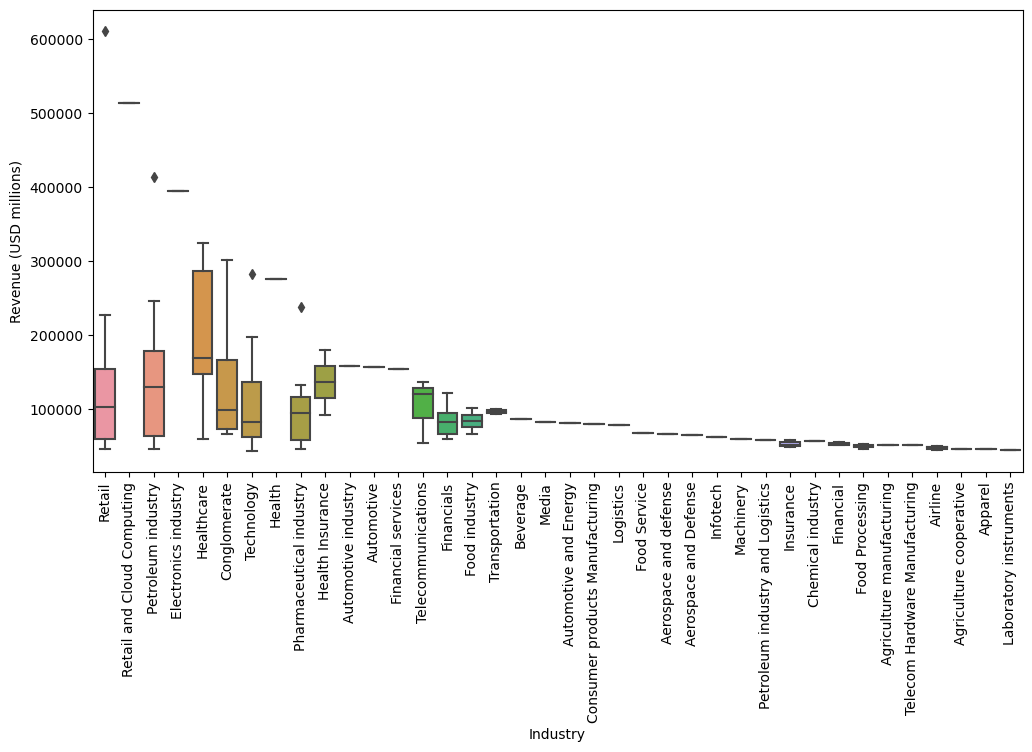

In [28]:
# Visualizing the distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='Revenue (USD millions)', data=new_table)
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Revenue (USD millions)')
plt.show()

In [29]:
# Spliting the 'Headquater Location' column on ', ' (comma followed by space)
new_table['Headquarters'] = new_table['Headquarters'].str.split(', ', expand=True)[1]

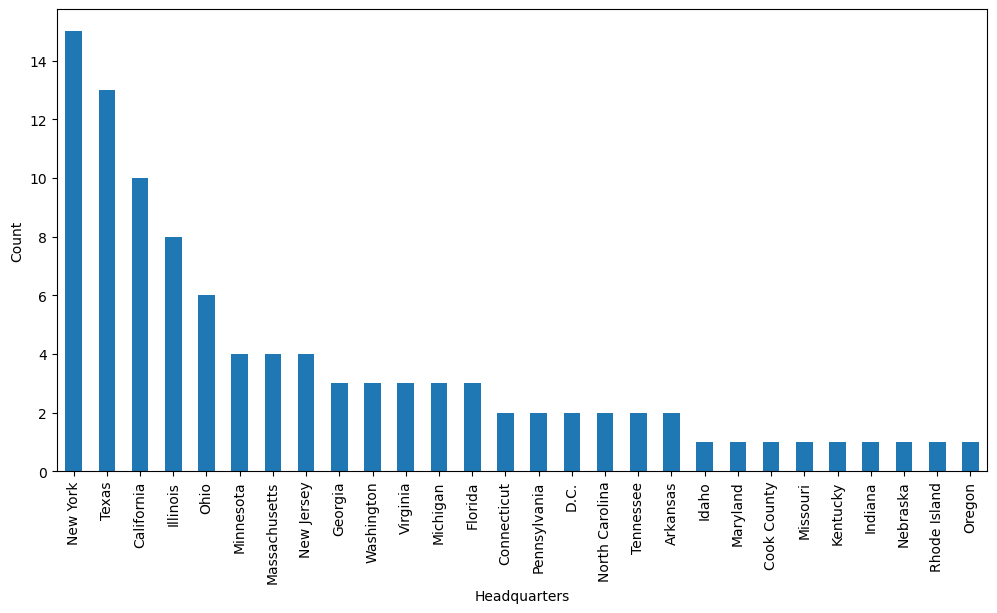

In [30]:
# Exploring geographical distribution
headquarters_count = new_table['Headquarters'].value_counts()
headquarters_count.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Headquarters')
plt.ylabel('Count')
plt.show()


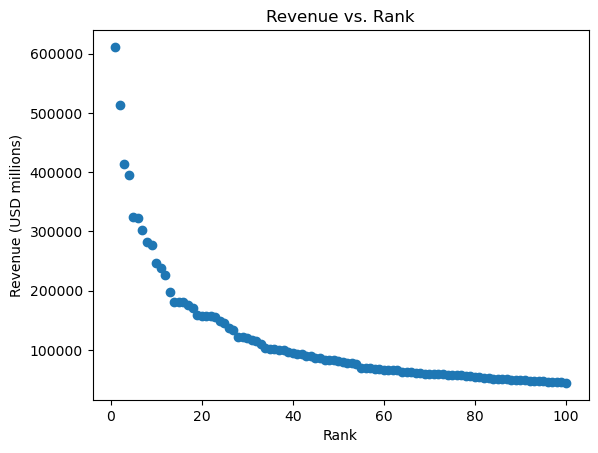

In [31]:
# Visualizing revenue vs. rank
plt.scatter(new_table['Rank'], new_table['Revenue (USD millions)'])
plt.xlabel('Rank')
plt.ylabel('Revenue (USD millions)')
plt.title('Revenue vs. Rank')
plt.show()

In [32]:
# Calculating total revenue
total_revenue = new_table['Revenue (USD millions)'].sum()
total_revenue

11756646

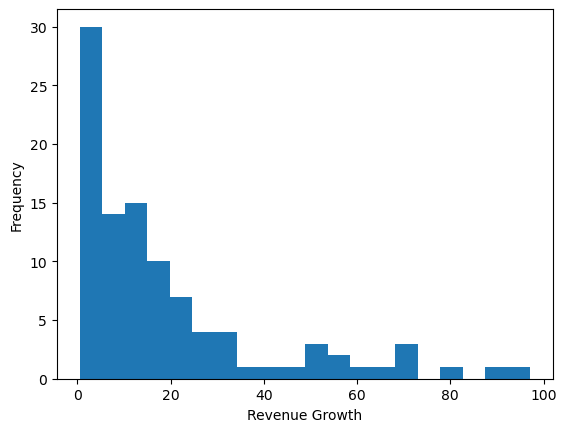

In [33]:
# Visualizing revenue growth distribution
plt.hist(new_table['Revenue growth'], bins=20)
plt.xlabel('Revenue Growth')
plt.ylabel('Frequency')
plt.show()

In [34]:
# Finding companies with highest and lowest growth rates
top_growth_companies = new_table.nlargest(10, 'Revenue growth')
bottom_growth_companies = new_table.nsmallest(10, 'Revenue growth')

In [35]:
top_growth_companies

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
65,66,TD Synnex,Infotech,62344,97.2,28500,Florida
71,72,World Fuel Services,Petroleum industry and Logistics,59043,88.4,5214,Florida
97,98,United Airlines,Airline,44955,82.5,92795,Illinois
93,94,PBF Energy,Petroleum industry,46830,71.8,3616,New Jersey
48,49,ConocoPhillips,Petroleum industry,82156,69.9,9500,Texas
86,87,Delta Air Lines,Airline,50582,69.2,95000,Georgia
90,91,American Airlines,Airline,48971,63.9,129700,Texas
92,93,Performance Food Group,Food Processing,47194,61.6,34825,Virginia
17,18,Valero Energy,Petroleum industry,171189,58.0,9743,Texas
60,61,StoneX Group,Financials,66036,55.3,305,New York


In [36]:
bottom_growth_companies

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
46,47,Wells Fargo,Financials,82859,0.5,238000,California
96,97,Bristol-Myers Squibb,Pharmaceutical industry,46159,0.5,34300,New York
38,39,Lowe's,Retail,97059,0.8,244500,North Carolina
64,65,HP,Technology,62983,0.8,58000,California
30,31,Meta Platforms,Technology,116609,1.1,86482,California
39,40,Johnson & Johnson,Pharmaceutical industry,94943,1.2,152700,New Jersey
61,62,Lockheed Martin,Aerospace and Defense,65984,1.6,116000,Maryland
54,55,MetLife,Financials,69898,1.7,45000,New York
51,52,United States Postal Service,Logistics,78620,2.0,576000,D.C.
25,26,Verizon Communications,Telecommunications,136835,2.4,117100,New York


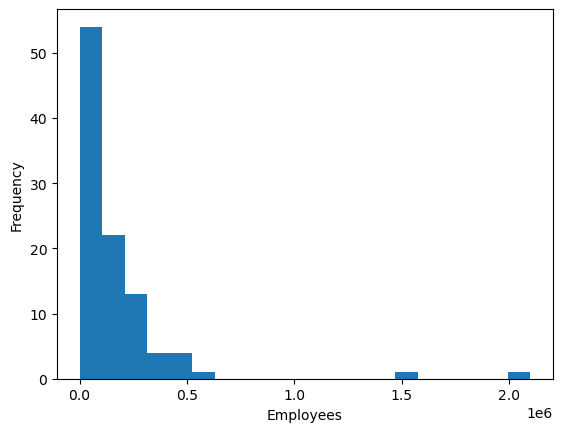

In [37]:
# Visualizing employee count distribution
plt.hist(new_table['Employees'], bins=20)
plt.xlabel('Employees')
plt.ylabel('Frequency')
plt.show()

In [38]:
# Finding companies with the most employees
top_employee_companies = new_table.nlargest(10, 'Employees')
top_employee_companies

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611289,6.7,2100000,Arkansas
1,2,Amazon,Retail and Cloud Computing,513983,9.4,1540000,Washington
51,52,United States Postal Service,Logistics,78620,2.0,576000,D.C.
40,41,FedEx,Transportation,93512,11.4,518249,Tennessee
19,20,The Home Depot,Retail,157403,4.1,471600,Georgia
32,33,Target Corporation,Retail,109120,2.9,440000,Minnesota
23,24,Kroger,Retail,148258,7.5,430000,Ohio
36,37,United Parcel Service,Transportation,100338,3.1,404700,Georgia
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,Minnesota
6,7,Berkshire Hathaway,Conglomerate,302089,9.4,383000,Nebraska


In [39]:
# Finding companies with the most and fewest employees
bottom_employee_companies = new_table.nsmallest(10, 'Employees')
bottom_employee_companies

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
60,61,StoneX Group,Financials,66036,55.3,305,New York
93,94,PBF Energy,Petroleum industry,46830,71.8,3616,New Jersey
75,76,Plains All American Pipeline,Petroleum industry,57342,36.3,4100,Texas
71,72,World Fuel Services,Petroleum industry and Logistics,59043,88.4,5214,Florida
73,74,Enterprise Products,Petroleum industry,58186,42.6,7300,Texas
44,45,Freddie Mac,Financials,86717,31.6,7819,Virginia
27,28,Fannie Mae,Financials,121596,19.7,8000,D.C.
48,49,ConocoPhillips,Petroleum industry,82156,69.9,9500,Texas
17,18,Valero Energy,Petroleum industry,171189,58.0,9743,Texas
91,92,CHS,Agriculture cooperative,47194,24.3,10014,Minnesota


In [40]:
# Calculating the correlation between the 'Rank' and 'Revenue'
correlation = new_table['Rank'].corr(new_table['Revenue (USD millions)'])
correlation 

-0.7746751834836888

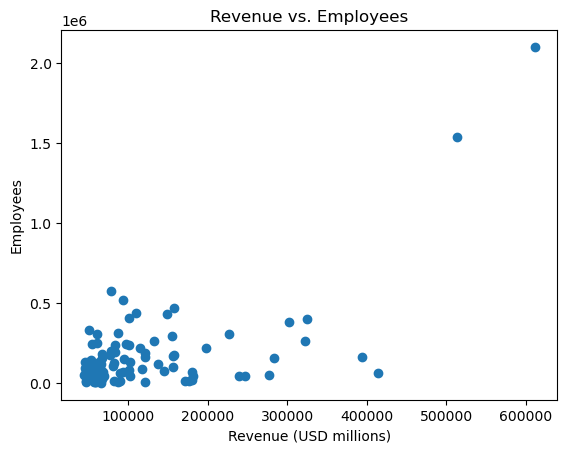

In [41]:
# Scatter plot visualization of revenue vs. employees
plt.scatter(new_table['Revenue (USD millions)'], new_table['Employees'])
plt.xlabel('Revenue (USD millions)')
plt.ylabel('Employees')
plt.title('Revenue vs. Employees')
plt.show()

In [45]:
# Importing required modules for linear regression analysis
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.metrics import mean_squared_error  # Evaluation metric

In [48]:
# Split data into train and test sets
X = new_table[['Employees', 'Revenue growth']]
y = new_table['Revenue (USD millions)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
# Creating and training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
# Making predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([ 93242.37045822, 112492.81733241,  93276.1401763 , 145166.60775356,
        84486.38408273, 107738.56618417, 144089.36282486,  97526.60193092,
        86322.73483037, 533668.49064227, 116188.79698053,  93278.6386324 ,
        87385.72778702, 104321.20615271, 119896.63737997, 164788.22018655,
        83325.41978556,  82139.05728864, 127225.74149731, 127575.10060377])

In [51]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mse

3955852211.118019